In [1]:
import pandas as pd
import re
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.concat( map(pd.read_csv,['ResaleFlatPricesBasedonApprovalDate19901999.csv', 'ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv', 'ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv', 'ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv', 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv']), ignore_index=True) 
#print(data) 
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [3]:
data.shape

(911594, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911594 entries, 0 to 911593
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                911594 non-null  object 
 1   town                 911594 non-null  object 
 2   flat_type            911594 non-null  object 
 3   block                911594 non-null  object 
 4   street_name          911594 non-null  object 
 5   storey_range         911594 non-null  object 
 6   floor_area_sqm       911594 non-null  float64
 7   flat_model           911594 non-null  object 
 8   lease_commence_date  911594 non-null  int64  
 9   resale_price         911594 non-null  float64
 10  remaining_lease      202544 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.5+ MB


In [5]:
data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,911594.000000,911594.000000,9.115940e+05
mean,95.699589,1988.106551,3.161537e+05
std,25.856575,10.487534,1.665168e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.908000e+05
50%,93.000000,1986.000000,2.930000e+05
75%,113.000000,1996.000000,4.100000e+05
max,307.000000,2022.000000,1.500000e+06


In [7]:
data.skew(numeric_only= True)

floor_area_sqm         0.367838
lease_commence_date    0.623863
resale_price           0.920837
dtype: float64

In [8]:
data['month'] = pd.to_datetime(data['month'])

# Extract the year and month into separate columns
data['year'] = data['month'].dt.year
data['month'] = data['month'].dt.month

In [9]:
# Calculate the remaining lease
data['remaining_lease'] = data['lease_commence_date'] + 99 - data['year']

In [10]:
data['flat_type'] = data['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [11]:
data['flat_type'].value_counts()

flat_type
4 ROOM              345664
3 ROOM              292131
5 ROOM              191884
EXECUTIVE            68695
2 ROOM               11383
1 ROOM                1299
MULTI GENERATION       538
Name: count, dtype: int64

In [12]:
data['flat_model'] = data['flat_model'].str.lower()
data['flat_model'] = data['flat_model'].str.title()

Visualization   

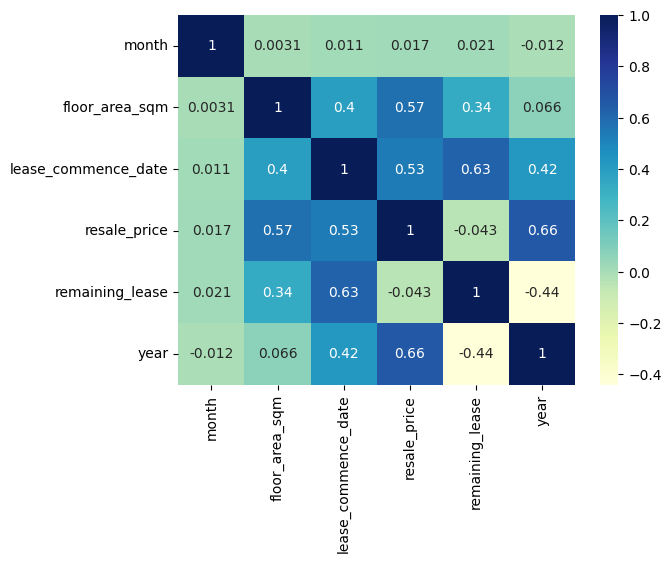

In [13]:
sns.heatmap(data.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.show()

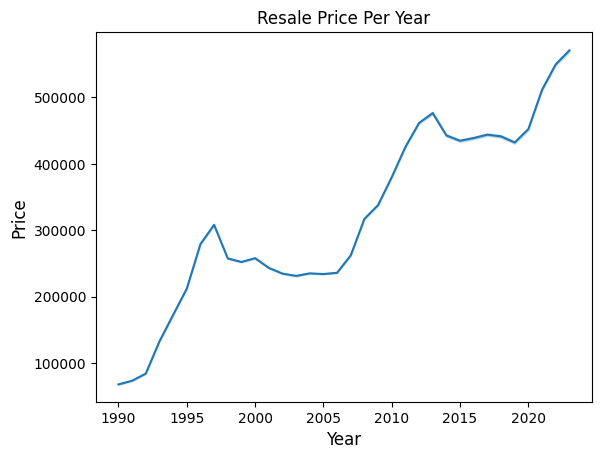

In [14]:
sns.lineplot(data = data, x ='year', y = 'resale_price')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Resale Price Per Year")
plt.show()

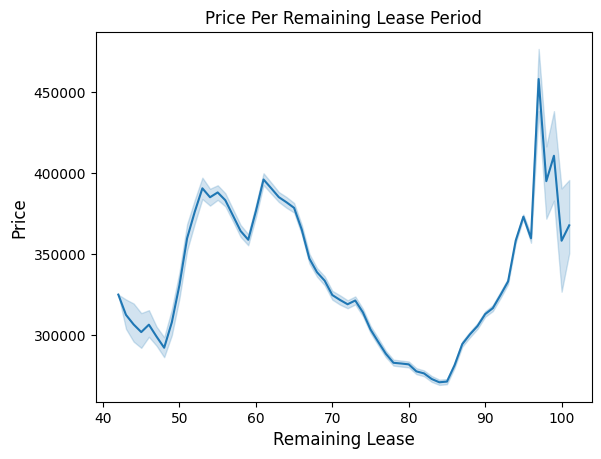

In [15]:
sns.lineplot(data = data, x ='remaining_lease', y = 'resale_price')
plt.xlabel('Remaining Lease', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Price Per Remaining Lease Period")
plt.show()

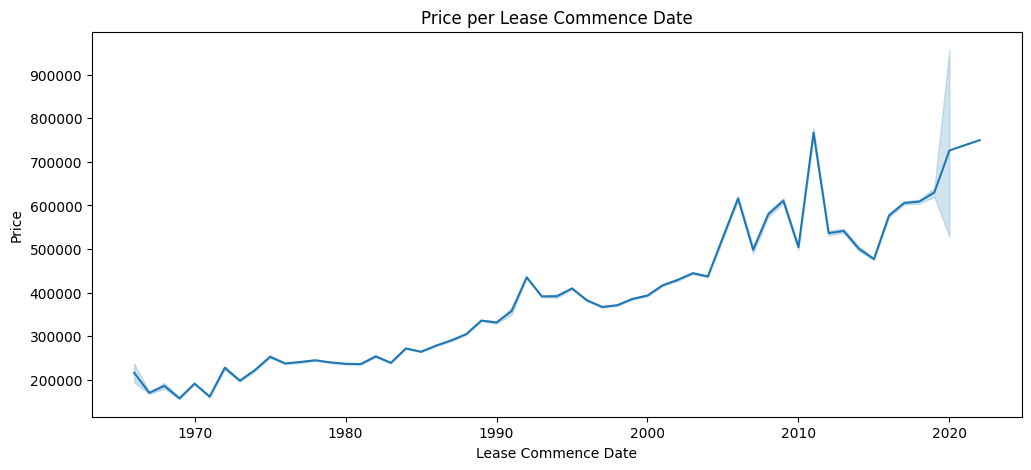

In [16]:
plt.figure(figsize=(12,5))
sns.lineplot(x='lease_commence_date', y='resale_price', data=data)
plt.xlabel('Lease Commence Date')
plt.ylabel('Price')
plt.title('Price per Lease Commence Date')
plt.show()

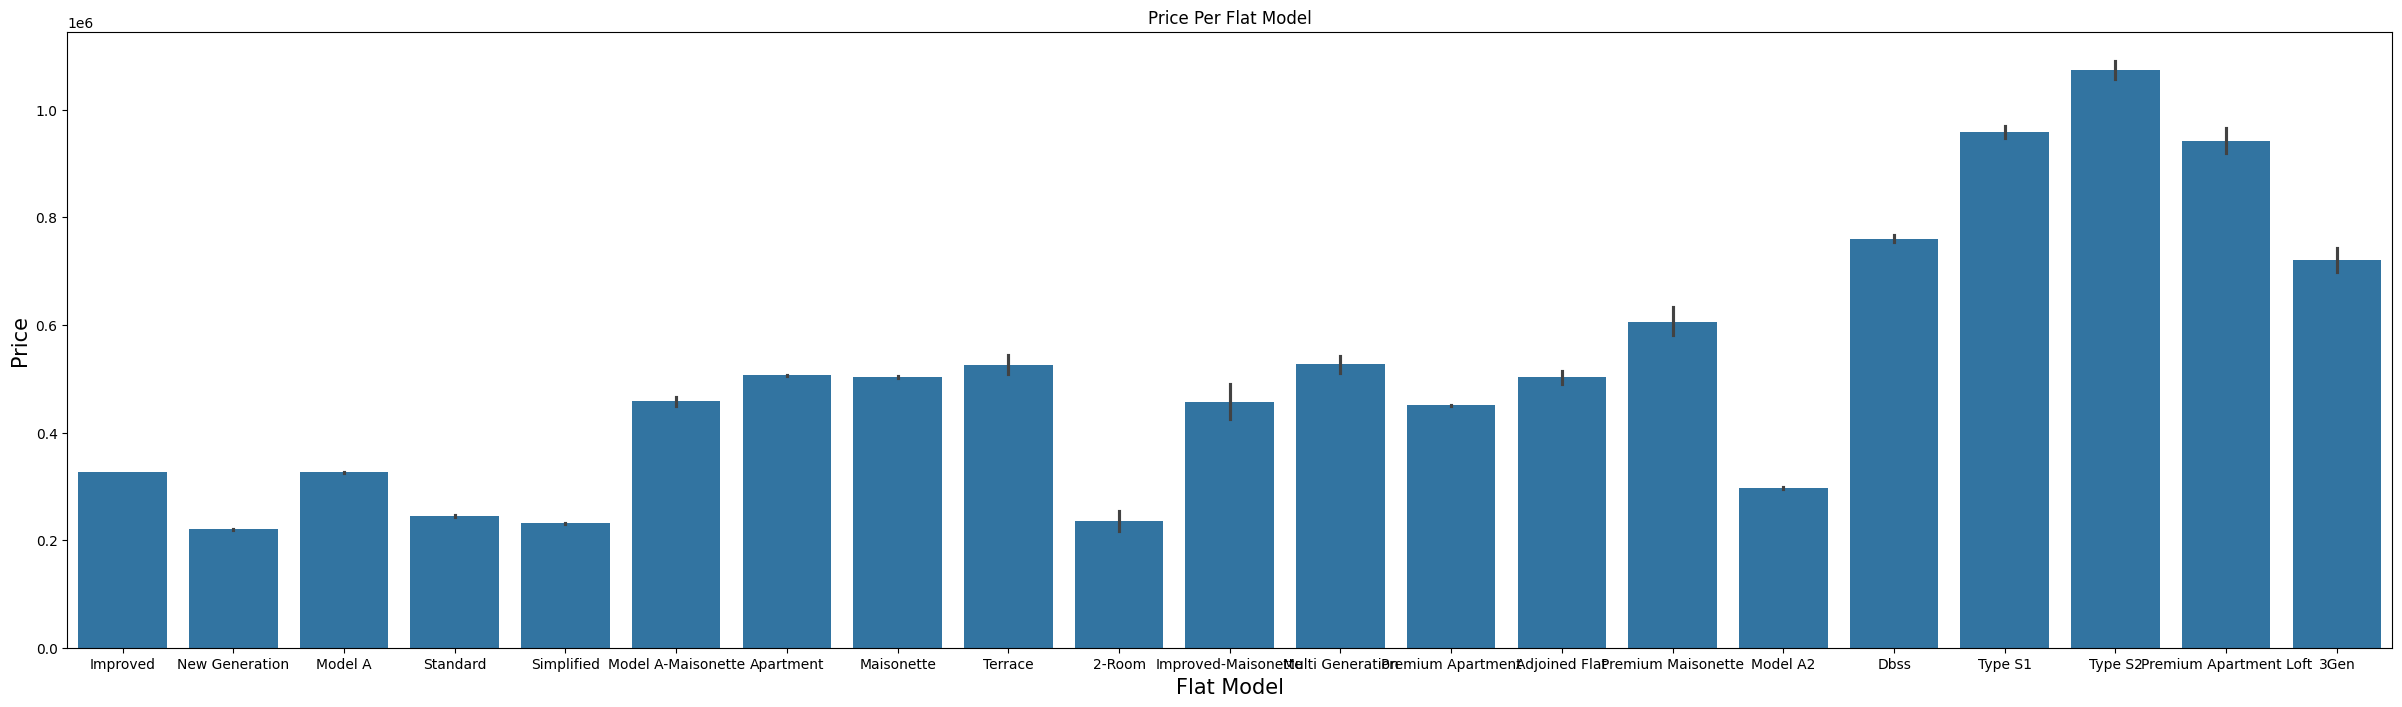

In [17]:
plt.figure(figsize=(30,8))
sns.barplot(x='flat_model',y = 'resale_price', data=data)
plt.xlabel('Flat Model', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title("Price Per Flat Model")
plt.show()

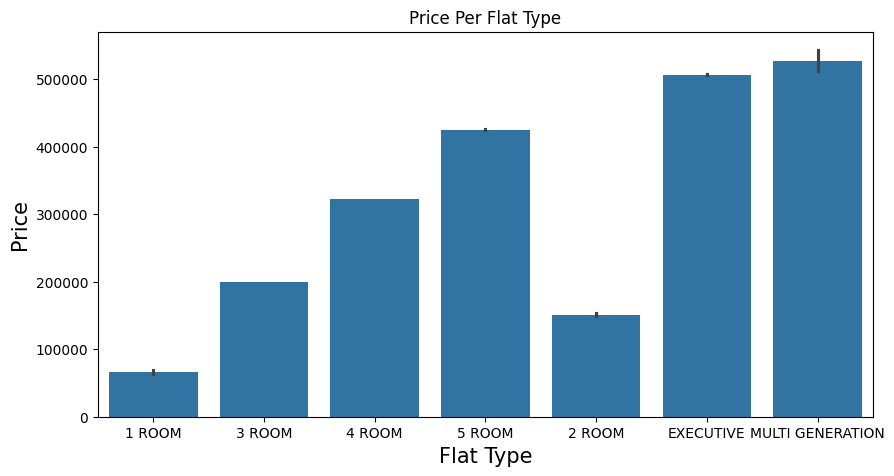

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x ='flat_type',y = 'resale_price')
plt.xlabel('Flat Type', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price Per Flat Type')
plt.show()

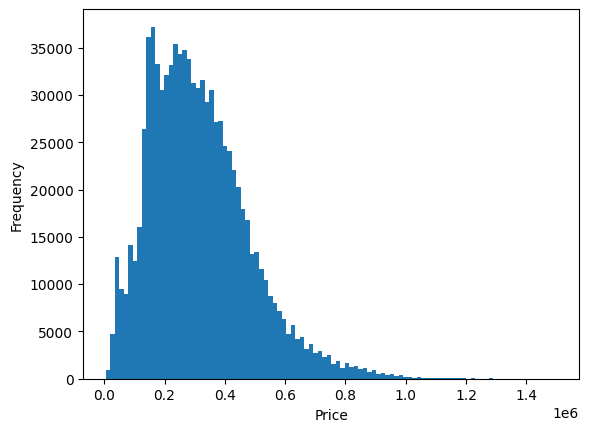

In [19]:
plt.hist(data['resale_price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [20]:

# Calculate the average of the upper and lower bounds and create a new column 'storey_range_avg'
data['storey_range_avg'] = data['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2)

# Drop the original 'storey_range' column
data.drop(columns=['storey_range'], inplace=True)

# Rename the 'storey_range_avg' column to 'storey_range'
data.rename(columns={'storey_range_avg': 'storey_range'}, inplace=True)

In [21]:
# Create a mapping from flat_type to integer values
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION' : 7
}

# Apply the mapping to the 'flat_type' column
data['flat_type_encoded'] = data['flat_type'].map(flat_type_mapping)

# You can drop the original 'flat_type' column if needed
data.drop(columns=['flat_type'], inplace=True)

# If you want to rename the new column to 'flat_type', you can do so
data.rename(columns={'flat_type_encoded': 'flat_type'}, inplace=True)

In [22]:
data.drop(['street_name','block'],axis=1, inplace = True)

OneHotEncoding

In [23]:
data2 = pd.get_dummies(data, columns=['town', 'flat_model'])

Train / Test Model

In [24]:
# Define features (X) and target (y)
X = data2.drop("resale_price", axis=1)
y = data2["resale_price"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the models
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_val)
linear_reg_mae = mean_absolute_error(y_val, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_val, linear_reg_pred)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_val, linear_reg_pred)
print("Linear Regression Results:")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Root Mean Squared Error: {linear_reg_rmse}")
print(f"R2 Score: {linear_reg_r2}")
print()

Linear Regression Results:
Mean Absolute Error: 52343.65997812899
Mean Squared Error: 4638606824.568993
Root Mean Squared Error: 68107.31843619299
R2 Score: 0.8328688348351955



In [26]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_val)
decision_tree_mae = mean_absolute_error(y_val, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_val, decision_tree_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2 = r2_score(y_val, decision_tree_pred)
print("Decision Tree Results:")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Root Mean Squared Error: {decision_tree_rmse}")
print(f"R2 Score: {decision_tree_r2}")
print()

Decision Tree Results:
Mean Absolute Error: 20883.22933283736
Mean Squared Error: 1010052451.0519875
Root Mean Squared Error: 31781.322361600807
R2 Score: 0.9636073395727884



In [27]:
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=4)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=4)

In [28]:
random_forest_pred = random_forest_model.predict(X_val)
random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
random_forest_mse = mean_squared_error(y_val, random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_pred)

In [29]:
print("Random Forest Results:")
print(f"Mean Absolute Error: {random_forest_mae}")
print(f"Mean Squared Error: {random_forest_mse}")
print(f"Root Mean Squared Error: {random_forest_rmse}")
print(f"R2 Score: {random_forest_r2}")
print()

Random Forest Results:
Mean Absolute Error: 34133.290968636655
Mean Squared Error: 2521374400.229584
Root Mean Squared Error: 50213.289079979455
R2 Score: 0.9091537055705867



In [30]:

import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

In [32]:
# Define a function to take user input
def get_user_input():
    user_input = {}

    user_input['month'] = int(input("Enter the month: "))
    user_input['floor_area_sqm'] = float(input("Enter the floor area in square meters: "))
    user_input['lease_commence_date'] = int(input("Enter the lease commencement year: "))
    user_input['remaining_lease'] = None
    user_input['year'] = int(input("Enter the year: "))
    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Calculate remaining lease based on user input
    #user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    user_input['storey_range'] = float(input("Enter the storey range: "))
    user_input['flat_type'] = int(input("Enter the flat type (e.g., 1, 2, 3, etc.): "))

    town = input("Enter the town (e.g., 'BEDOK', 'TAMPINES', etc.): ")
    flat_model = input("Enter the flat model (e.g., 'Improved', 'New Generation', etc.): ")

    # Set all other 'town' columns to 0
    all_town_columns = [
        'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
        'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
        'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
        'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
        'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
        'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN'
    ]

    for town_column in all_town_columns:
        if town_column != f'town_{town}':
            user_input[town_column] = 0
        else:
            user_input[f'town_{town}'] = 1

    # Set all other 'flat_model' columns to 0
    all_flat_model_columns = [
        'flat_model_2-Room', 'flat_model_3Gen', 'flat_model_Adjoined Flat', 'flat_model_Apartment',
        'flat_model_Dbss', 'flat_model_Improved', 'flat_model_Improved-Maisonette',
        'flat_model_Maisonette', 'flat_model_Model A', 'flat_model_Model A-Maisonette',
        'flat_model_Model A2', 'flat_model_Multi Generation', 'flat_model_New Generation',
        'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
        'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Standard',
        'flat_model_Terrace', 'flat_model_Type S1', 'flat_model_Type S2'
    ]

    for flat_model_column in all_flat_model_columns:
        if flat_model_column != f'flat_model_{flat_model}':
            user_input[flat_model_column] = 0
        else:
            user_input[f'flat_model_{flat_model}'] = 1

    return user_input

In [ ]:
# Get user input
user_input_data = get_user_input()

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input_data])

# Use the model to make predictions
predicted_prices = random_forest_model.predict(user_input_df)

# Print the predicted resale price
print("Predicted Resale Price:", predicted_prices[0])